# Linear SVM classifier

## Download the dataset

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [2]:
print('100 examples with two features:\n{}'.format(X.shape))

100 examples with two features:
(100, 2)


In [3]:
print('A single label per example:\n{}'.format(y.shape))

A single label per example:
(100,)


In [4]:
# Labels are ordered 

y[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.grid(which='both')
plt.title('A linearly seperable dataset')
plt.colorbar()

## Train a LinearSVM classifier

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Create a pipeline of required stages
svm_clf = Pipeline([
    ('Feature_scaling', StandardScaler()),
    ('Linear_SVC', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X, y)
X_transformed = svm_clf['Feature_scaling'].transform(X)

In [7]:
svm_clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Calculate the decision boundary

In [8]:
import numpy as np

coef = svm_clf['Linear_SVC'].coef_[0]
intercept = svm_clf['Linear_SVC'].intercept_[0]

print(coef)
print(intercept)

def calc_decision_boundary(min_x_1, max_x_1, intercept, coef):

    x_1 = np.linspace(-1.5, 1.5, num=100)
    x_2 = (-intercept - coef[0]*x_1) / coef[1]
    
    return x_1, x_2
    
x_1, x_2 = calc_decision_boundary(-1.5, 1.5, intercept, coef)
boundary_LinearSVC = (x_1, x_2, 'LinearSVC')

[1.0607458  1.00177835]
0.2958887668023067


In [9]:
# Note plotting the transformed data (as prediction function will output this)

def plot_decision_boundary(X_trans, boundaries):

    plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)
    for line in boundaries:
        plt.plot(line[0], line[1], label=line[2])
    plt.xlabel('x_1_transformed')
    plt.ylabel('x_2_transformed')
    plt.grid(which='both')
    plt.title('A linearly seperable dataset')
    plt.colorbar()
    plt.legend()

## Train an SVC classifier

In [56]:
from sklearn.svm import SVC

svc_clf = Pipeline([
    ('Feature scaling', StandardScaler()),
    ('svc', SVC(kernel='linear', coef0=1, C=0.3))
])

svc_clf.fit(X, y)
svc_clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Calc the decision boundary

In [57]:
intercept = svc_clf['svc'].intercept_[0]
coeff = svc_clf['svc'].coef_[0]

x_1_svc, x_2_svc = calc_decision_boundary(-1.5, 1.5, intercept, coef)
boundary_SVC = (x_1_svc, x_2_svc, 'SVC')

## Train a SGDClassifier

In [58]:
from sklearn.linear_model import SGDClassifier

In [59]:
sgd_clf = Pipeline([
    ('Feature_scaling', StandardScaler()),
    ('SGDClassifier', SGDClassifier(loss='hinge',
                                   alpha = 0.005))
])

In [60]:
sgd_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('Feature_scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SGDClassifier',
                 SGDClassifier(alpha=0.005, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

### Calc the decision boundary

In [61]:
intercept = sgd_clf['SGDClassifier'].intercept_[0]
coeff = sgd_clf['SGDClassifier'].coef_[0]

x_1_sgd, x_2_sgd = calc_decision_boundary(-1.5, 1.5, intercept, coef)
boundary_SGD = (x_1_sgd, x_2_sgd, 'SGD')

### Plot the decision boundaries

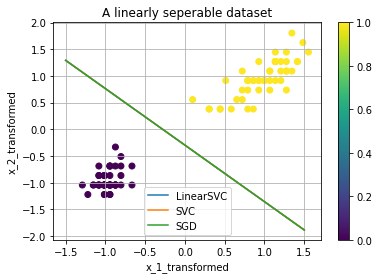

In [62]:
plot_decision_boundary(X_transformed, [boundary_LinearSVC, boundary_SVC, boundary_SGD])